In [18]:
from __future__ import print_function
import argparse
import os

from IPython.display import Image

import torch
from torch.autograd import Variable
import torchvision.transforms as transforms

from util import is_image_file, load_img, save_img

In [19]:
cuda = True
#we load the generator
netG = torch.load("checkpoint/facades/netG_model_epoch_200.pth")

In [20]:
#read the black and white image
image_dir = "dataset/facades/jupyter/"
image_filenames = [x for x in os.listdir(image_dir) if is_image_file(x)]

transform_list = [transforms.ToTensor(),
                  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]

transform = transforms.Compose(transform_list)


In [21]:
for image_name in image_filenames:
    img = load_img(image_dir + image_name)
    img = transform(img)
    input = Variable(img).view(1, -1, 256, 256)

    if cuda:
        netG = netG.cuda()
        input = input.cuda()

    out = netG(input)
    out = out.cpu()
    out_img = out.data[0]
    if not os.path.exists(os.path.join("result/jupyter")):
        os.makedirs(os.path.join("result/jupyter"))
    save_img(out_img, "result/jupyter/{}".format(image_name))

Image saved as result/jupyter/cmp_b0201.jpg


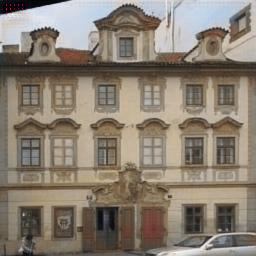

In [26]:
Image("result/jupyter/{}".format(image_name))

